# 1. Importando bibliotecas e dados

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import neighbors
from sklearn.model_selection import train_test_split

In [16]:
header =  ['Comprimento sepala (cm)', 'Largura Sepala (cm)', "Comprimento petala (cm)", 'largura petala(cm)', 'Class']
data = pd.read_csv('iris.data', names=header)

# 2. Manipulação e Visualização dos dados

In [17]:
data.head()

,Comprimento sepala (cm),Largura Sepala (cm),Comprimento petala (cm),largura petala(cm),Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [34]:
data['Class'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [14]:
#get dummies na marra
def getDummies(x):
    if x == 'Iris-setosa':
        return 0
    elif x == 'Iris-versicolor':
        return 1
    else:
        return 2
data['Class_dummies'] = data['Class'].map(getDummies)

In [18]:
#data.join(pd.get_dummies(data['Class']))
data.head()

,Comprimento sepala (cm),Largura Sepala (cm),Comprimento petala (cm),largura petala(cm),Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


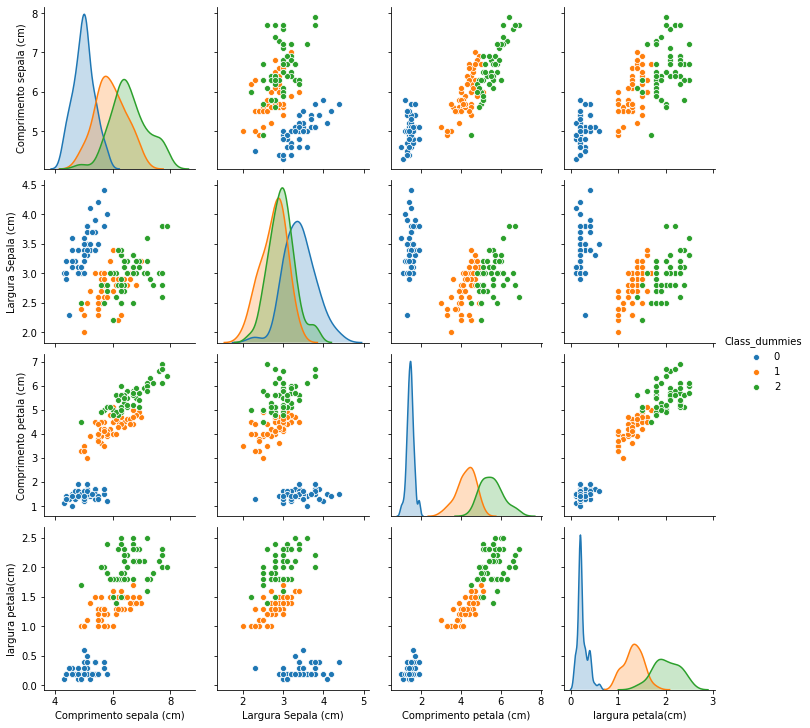

In [37]:
sns.pairplot(data, hue="Class_dummies")
#{0:'Iris-setosa', 1:'Iris-versicolor', 2:'Iris-virginica'}

In [58]:
#data.drop("Class", axis=1, inplace=True)

In [19]:
data.head()

,Comprimento sepala (cm),Largura Sepala (cm),Comprimento petala (cm),largura petala(cm),Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


# 3. Criação do Modelo

In [7]:
X = data.drop('Class', axis=1)
y = data['Class']

In [54]:
X = data.drop('Class_dummies', axis=1)
y = data['Class_dummies']

In [8]:
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y)

In [9]:
model = neighbors.KNeighborsClassifier(3)

In [10]:
model.fit(X_treino,y_treino)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [11]:
model.predict(X_teste)

array(['Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-virginica', 'Iris-setosa',
       'Iris-virginica', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-setosa', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-setosa', 'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-setosa', 'Iris-versicolor'], dtype=object)

In [12]:
np.mean(y_teste==model.predict(X_teste))

0.9473684210526315

# 4. Validação do modelo